### Description of the Dataset

The time series under study is the **Industrial Production Index (IPI)**, with a base value of **100 in 2015**, for the **manufacture of assembled electronic boards in France**.  
The data is adjusted for **seasonal variations and the number of working days (CVS-CJO)**, and is recorded on a **monthly basis**, starting from **January 1990** and ending in **March 2022**.

The IPI measures the **volume of industrial production** over time. An index value of:
- **100** corresponds to production levels in the base year (2015),
- **above 100** indicates higher production than in 2015,
- **below 100** indicates lower production than in 2015.

The dataset contains the following columns:
- `date`: The full date of observation (e.g., "2020-05-01")
- `ipi`: The index value (e.g., 102.3)
- `year`: The year (e.g., 2020)
- `month`: The month (e.g., 5 for May)


The goal of this assignment is to analyze, model, and forecast a real-world univariate time series representing economic activity of a country. In this exercise, you are provided with a dataset named `ipi_data.csv`.

This dataset contains monthly observations of the **Industrial Production Index (IPI)** for the sector of *assembled electronic circuit manufacturing*, adjusted for seasonal effects and working-day variation (CVS-CJO). The series spans from **January 1990 to March 2022** and contains the following variables:

- `date`: the first day of each month  
- `ipi`: the index value (base year 2015 = 100)  
- `year`, `month`: numeric breakdown of the date (provided for convenience)

You will apply a full Box-Jenkins methodology to this series: transform and stabilize the data, assess stationarity, estimate an appropriate ARIMA model, evaluate model diagnostics, and generate forecasts with confidence intervals.

### Part I: Data Exploration and Preprocessing

1. Apply any necessary transformations (e.g., logarithm, differencing) to achieve stationarity. Justify your steps clearly.
2. Provide appropriate plots: the original and transformed series, as well as ACF and PACF visualizations.

### Part II: ARMA/ARIMA Modeling

1. Identify and fit an appropriate ARMA(p,q) or ARIMA(p,d,q) model to the transformed series. Justify your model choice using diagnostics.
2. Estimate the model parameters, comment on their significance, and validate the model (residual analysis, independence, normality, etc.).

### Part III: Forecasting and Interpretation

Let *T* be the length of the observed series.

1. Write the equation for the 100(1−α)% confidence interval for future values X<sub>T+1</sub>, X<sub>T+2</sub>.
2. What assumptions are necessary for these intervals to be valid?
3. Generate and plot a 2-step forecast with 95% confidence bands. Comment on the forecast.



In [ ]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import norm
from statsmodels.api import OLS, add_constant
import warnings

In [ ]:
#Load Dataset
df = pd.read_csv("path/to/your/dataset.csv")  # Replace with your dataset path

In [ ]:
df.head()

,date,ipi,year,month
0,1990-01-01,25.69,1990,1
1,1990-02-01,25.44,1990,2
2,1990-03-01,25.40,1990,3
3,1990-04-01,25.48,1990,4
4,1990-05-01,25.21,1990,5


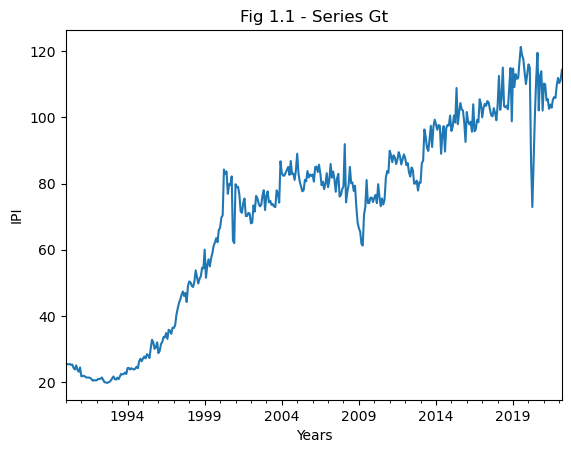

In [ ]:
# Ensure proper data types
df['date'] = pd.to_datetime(df['date'])
df['ipi'] = pd.to_numeric(df['ipi'], errors='coerce')

# Create time series indexed by date
xm = pd.Series(df['ipi'].values, index=pd.date_range(start='1990-01', periods=len(df), freq='MS'))

# Plot original series
xm.plot(title='Fig 1.1 - Series Gt', ylabel='IPI', xlabel='Years')
plt.show()

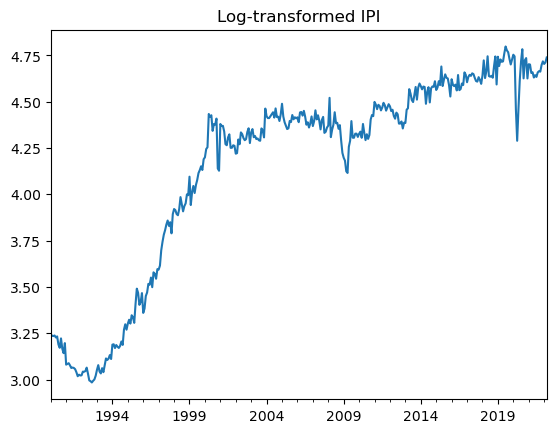

In [ ]:
# Log transform
###YOUR CODE HERE
xlog.plot(title='Log-transformed IPI')
plt.show()

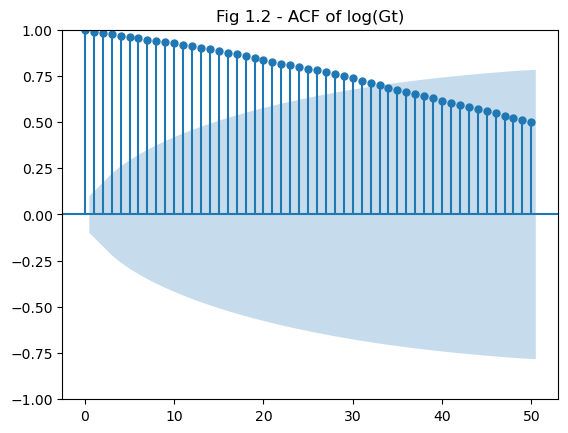

In [ ]:
# ACF of log series
###YOUR CODE HERE - apply log transform to the series
plt.title('Fig 1.2 - ACF of log(Gt)')
plt.show()

In [ ]:
# Trend regression
model = ###YOUR CODE HERE - fit OLS regression of log-series on time
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1459.
Date:                Thu, 22 May 2025   Prob (F-statistic):          5.14e-133
Time:                        20:57:48   Log-Likelihood:                -8.8558
No. Observations:                 387   AIC:                             21.71
Df Residuals:                     385   BIC:                             29.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3154      0.025    131.637      0.0

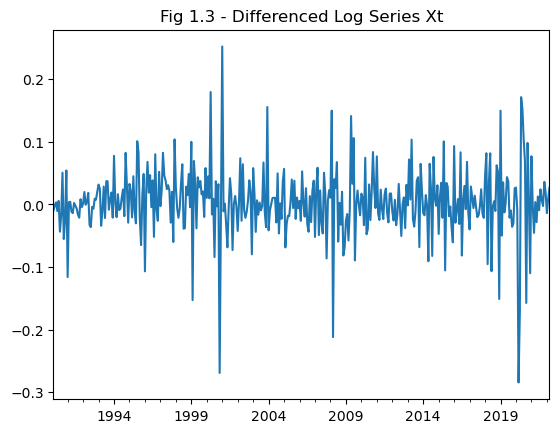

In [ ]:
# Differencing
xlogfd = ###YOUR CODE HERE - apply first difference to log-transformed series (Hint: remember to add ".dropna()")
xlogfd.plot(title='Fig 1.3 - Differenced Log Series Xt')
plt.show()

#REFLECT: Based on the regression results, is a deterministic trend present?

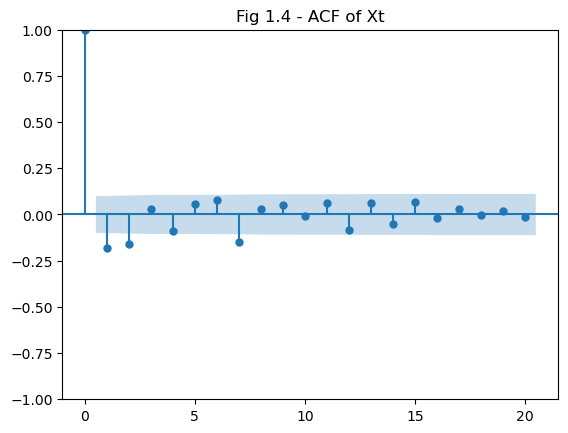

In [ ]:
# ACF of differenced log
plot_acf(xlogfd, lags=20)
plt.title('Fig 1.4 - ACF of Xt')
plt.show()

In [ ]:
# Regression on differenced series
model_diff = OLS(xlogfd.values, add_constant(np.arange(len(xlogfd)))).fit()
print(model_diff.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2526
Date:                Thu, 22 May 2025   Prob (F-statistic):              0.616
Time:                        20:58:24   Log-Likelihood:                 575.16
No. Observations:                 386   AIC:                            -1146.
Df Residuals:                     384   BIC:                            -1138.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.006      1.131      0.2

In [ ]:
# ADF test (Phillips-Perron equivalent)
adf_result = ###YOUR CODE HERE - run ADF test on differenced log series
print(f'ADF Statistic: {adf_result[0]}, p-value: {adf_result[1]}')

### REFLECT: What does the p-value say about the differenced series stationary?

ADF Statistic: -8.975084442628637, p-value: 7.570083182639529e-15


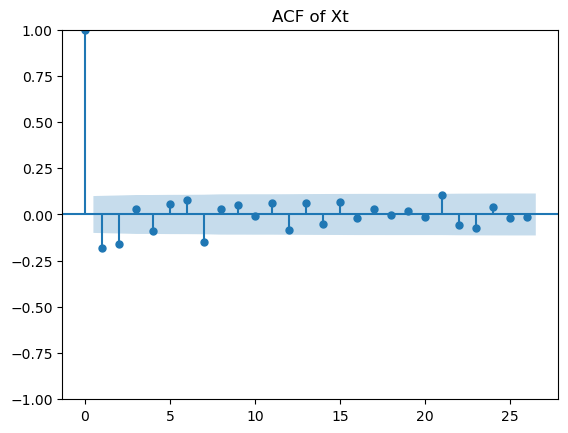

In [ ]:
# Mean-centered series for model selection
### YOUR CODE HERE - build mean-centered series using difference from mean

# ACF/PACF plots
plot_acf(y)
plt.title('ACF of Xt')
### YOUR CODE HERE - show the plot

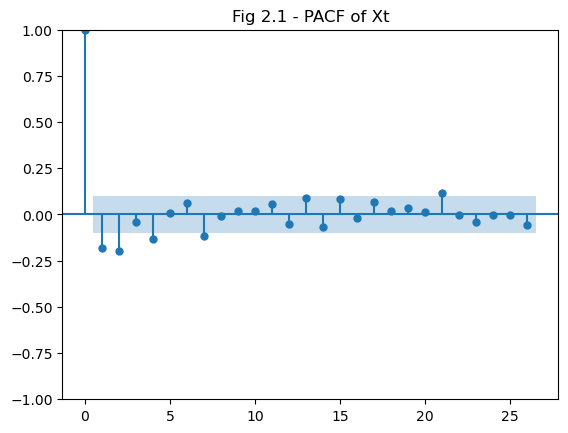

In [ ]:
plot_pacf(y)
plt.title('Fig 2.1 - PACF of Xt')
plt.show()

In [ ]:
# Grid search for ARMA(p,q)
warnings.filterwarnings('ignore')
pmax, qmax = 7, 7
aic_matrix = np.full((pmax + 1, qmax + 1), np.nan)
### YOUR CODE HERE - initialize bic_matrix

for p in range(pmax + 1):
    for q in range(qmax + 1):
        try:
            model = ARIMA(y, order=(p, 0, q)).fit()
            aic_matrix[p, q] = model.aic
            bic_matrix[p, q] = model.bic
        except:
            continue

print("AIC Matrix:\n", aic_matrix)
print("BIC Matrix:\n", bic_matrix)

AIC Matrix:
 [[-1146.07396343 -1164.10217466 -1173.9798469  -1172.11639102
  -1170.98337526 -1169.953298   -1168.53698664 -1172.39851201]
 [-1156.7415892  -1171.37759324 -1172.23928871 -1170.58430188
  -1169.19236285 -1167.46520817 -1169.51429899 -1171.15288162]
 [-1170.01410531 -1171.09271185 -1170.69558037 -1168.25946165
  -1171.9109356  -1170.06065698 -1172.33910261 -1170.45476924]
 [-1168.73376513 -1169.52117333 -1168.81125633 -1168.86652843
  -1170.05716251 -1167.40929821 -1166.31955666 -1163.01141576]
 [-1173.26937066 -1171.28559154 -1172.80086008 -1169.15588203
  -1169.09771731 -1172.59115925 -1168.45134926 -1168.01812796]
 [-1171.29997559 -1169.35687432 -1171.05149255 -1152.21801713
  -1167.10536107 -1167.01081854 -1168.8094339  -1160.84462905]
 [-1170.74189536 -1170.95584415 -1167.77647572 -1168.25478783
  -1166.35457384 -1164.9329275  -1167.10922779 -1164.69793608]
 [-1174.15307987 -1172.14465719 -1170.27914921 -1168.33226334
  -1165.38015382 -1164.88256217 -1164.66266594 -11

In [ ]:
best_aic = np.unravel_index(np.nanargmin(aic_matrix), aic_matrix.shape)
best_bic = ###YOUR CODE HERE
print("Best AIC model (p,q):", best_aic)
print("Best BIC model (p,q):", best_bic)

Best AIC model (p,q): (7, 0)
Best BIC model (p,q): (0, 2)


In [ ]:
# Fit final models
model_aic = ###YOUR CODE HERE
model_bic = ###YOUR CODE HERE
print("AIC model summary:\n", model_aic.summary())
print("BIC model summary:\n", ###YOUR CODE HERE

AIC model summary:
                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  386
Model:                 ARIMA(7, 0, 0)   Log Likelihood                 596.077
Date:                Thu, 22 May 2025   AIC                          -1174.153
Time:                        21:00:48   BIC                          -1138.551
Sample:                    02-01-1990   HQIC                         -1160.034
                         - 03-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.651e-07      0.002      0.001      1.000      -0.003       0.003
ar.L1         -0.2215      0.032     -7.012      0.000      -0.283      -0.160
ar.L2         -0.2215      0.037

In [ ]:
# Ljung-Box test
lb_test = ###YOUR CODE HERE - run Ljung-Box test on model residuals (Hint: run it on model_bic.resid with lags=24)
print("Ljung-Box test on residuals:\n", lb_test)

Ljung-Box test on residuals:
       lb_stat  lb_pvalue
1    0.006457   0.935952
2    0.011914   0.994061
3    0.253774   0.968474
4    1.912754   0.751802
5    2.509311   0.775092
6    3.917233   0.687876
7    9.702335   0.206079
8   10.007435   0.264504
9   10.988395   0.276505
10  11.000172   0.357505
11  13.191173   0.281014
12  14.777257   0.253844
13  16.906626   0.203608
14  17.355870   0.237709
15  20.123172   0.167258
16  20.123188   0.214723
17  21.440465   0.207205
18  21.525083   0.253754
19  22.534643   0.258461
20  22.537704   0.312060
21  26.169466   0.200061
22  27.247574   0.201974
23  29.008114   0.180041
24  29.122265   0.215563


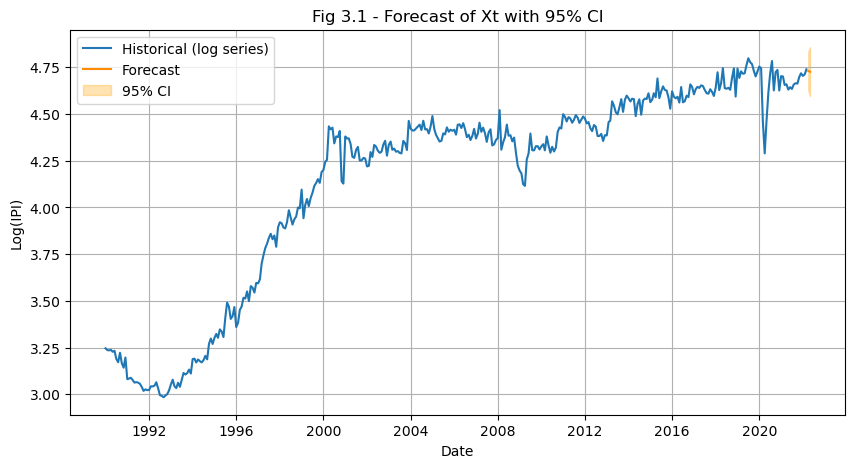

In [ ]:
# Forecasting with ARIMA(p,1,q) on original log series
final_model = ARIMA(___, order=(best_bic[0], 1, best_bic[_])).___() ###FILL IN THE BLANKS
forecast_result = ###YOUR CODE HERE

# Manual plotting of forecast with confidence intervals
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

plt.figure(figsize=(10, 5))
plt.plot(xlog, label='Historical (log series)')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='darkorange')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1],
                 color='orange', alpha=0.3, label='95% CI')
plt.title('Fig 3.1 - Forecast of Xt with 95% CI')
plt.xlabel('Date')
plt.ylabel('Log(IPI)')
plt.legend()
plt.grid(True)
plt.show()

###REFLECT: Comment on the shape and uncertainty of the forecas